## Loading modules, data and preprocessing

In [1]:
import sklearn 
# Import all of the scikit learn stuff 
from __future__ import print_function 
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer 
import pandas as pd
import numpy as np


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import re

stopwords = nltk.corpus.stopwords
eng_stopwords = stopwords.words('english')
ps = nltk.stem.PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def basic_preprocessing(text):
    text = text.lower() #lowering
    text = re.sub(r'\[.*?\]', '', text) #removing all instances of citation brackets found in wiki articles
    text = word_tokenize(text)
    text = [word for word in text if word not in eng_stopwords] #removing stop words
    text = [word for word in text if len(word) > 1] #removing single character tokens
    text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    text = [ps.stem(word) for word in text]

    return(text)


In [3]:
documents = [
             "Sam loves computers. Computers have software.",
             "Computers need software to run",
             "Cats sat on Sam. Sam likes and cares for his cats",
             "Sam's cats don't care where Sam is",
             "Software in computers is cool. Sam loves software",
             "Sam thinks Cats are nice. They sit where they like and do not care"
            ]

sample_processed_texts = [basic_preprocessing(text) for text in documents]

In [12]:
all_texts_summary = [text[:20] for text in documents]
all_texts_summary

['Sam loves computers.',
 'Computers need softw',
 'Cats sat on Sam. Sam',
 "Sam's cats don't car",
 'Software in computer',
 'Sam thinks Cats are ']

## Creating the TFIDF Matrix of data

In [13]:
x = TfidfVectorizer()
x.fit(documents)
all_texts_summary = [text[:20] for text in documents]
tfidf = x.transform(documents)
pd.DataFrame(tfidf.todense(), index=all_texts_summary, columns=x.get_feature_names())

,and,are,care,cares,cats,computers,cool,do,don,for,...,on,run,sam,sat,sit,software,they,thinks,to,where
Sam loves computers.,0.000000,0.000000,0.000000,0.000000,0.000000,0.665302,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.246169,0.000000,0.000000,0.332651,0.000000,0.000000,0.000000,0.000000
Computers need softw,0.000000,0.000000,0.000000,0.000000,0.000000,0.347962,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.502608,0.000000,0.000000,0.000000,0.347962,0.000000,0.000000,0.502608,0.000000
Cats sat on Sam. Sam,0.264115,0.000000,0.000000,0.322086,0.445969,0.000000,0.000000,0.000000,0.000000,0.322086,...,0.322086,0.000000,0.330027,0.322086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sam's cats don't car,0.000000,0.000000,0.384577,0.000000,0.324687,0.000000,0.000000,0.000000,0.468989,0.000000,...,0.000000,0.000000,0.480551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.384577
Software in computer,0.000000,0.000000,0.000000,0.000000,0.000000,0.282546,0.408119,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.209090,0.000000,0.000000,0.565091,0.000000,0.000000,0.000000,0.000000
Sam thinks Cats are,0.221069,0.269591,0.221069,0.000000,0.186641,0.000000,0.000000,0.269591,0.000000,0.000000,...,0.000000,0.000000,0.138119,0.000000,0.269591,0.000000,0.539183,0.269591,0.000000,0.221069


## Applying SVD

In [15]:
n_topics = 2
lsa = TruncatedSVD(n_topics, algorithm = 'arpack')
lsa.fit(tfidf)
lsa_data = lsa.transform(tfidf)

In [23]:
lsa.components_
print(lsa.explained_variance_)
print(lsa.explained_variance_ratio_)

[0.03771687 0.22102334]
[0.05452911 0.31954414]


In [25]:
lsa.singular_values_

array([1.39038728, 1.19972874])

In [35]:
lsa_data

array([[ 0.77228086, -0.32416197],
       [ 0.53584776, -0.42063724],
       [ 0.33997378,  0.58578388],
       [ 0.48949478,  0.60840497],
       [ 0.78613358, -0.24493166],
       [ 0.27646507,  0.61971083]])

### Printing concept-word matrix

In [26]:
concepts = ['concept{}'.format(i) for i in range(n_topics)]
concept_word = pd.DataFrame(lsa.components_, columns=x.get_feature_names(), index=concepts)
concept_word

,and,are,care,cares,cats,computers,cool,do,don,for,...,on,run,sam,sat,sit,software,they,thinks,to,where
concept0,0.078063,0.038554,0.128993,0.056643,0.187334,0.477128,0.165963,0.038554,0.118751,0.056643,...,0.056643,0.139315,0.382840,0.056643,0.038554,0.459136,0.077109,0.038554,0.139315,0.128993
concept1,0.202670,0.116072,0.257740,0.131082,0.399101,-0.299605,-0.069449,0.116072,0.198239,0.131082,...,0.131082,-0.146883,0.305886,0.131082,0.116072,-0.272767,0.232145,0.116072,-0.146883,0.257740


### Printing document-concept matrix

In [27]:
doc_concept = pd.DataFrame(lsa_data, index = all_texts_summary, columns=concepts)
doc_concept

,concept0,concept1
Sam loves computers.,0.772281,-0.324162
Computers need softw,0.535848,-0.420637
Cats sat on Sam. Sam,0.339974,0.585784
Sam's cats don't car,0.489495,0.608405
Software in computer,0.786134,-0.244932
Sam thinks Cats are,0.276465,0.619711


### Obtaining document-document similarities

In [28]:
matrix_similarity = np.asarray(np.asmatrix(lsa_data) * np.asmatrix(lsa_data).T) 
pd.DataFrame(matrix_similarity,index=all_texts_summary, columns=all_texts_summary)

,Sam loves computers.,Computers need softw,Cats sat on Sam. Sam,Sam's cats don't car,Software in computer,Sam thinks Cats are
Sam loves computers.,0.701499,0.550180,0.072666,0.180806,0.686513,0.012622
Computers need softw,0.550180,0.464069,-0.064228,0.006377,0.524275,-0.112530
Cats sat on Sam. Sam,0.072666,-0.064228,0.458725,0.522809,0.123788,0.457007
Sam's cats don't car,0.180806,0.006377,0.522809,0.609762,0.235791,0.512363
Software in computer,0.686513,0.524275,0.123788,0.235791,0.677998,0.065552
Sam thinks Cats are,0.012622,-0.112530,0.457007,0.512363,0.065552,0.460474


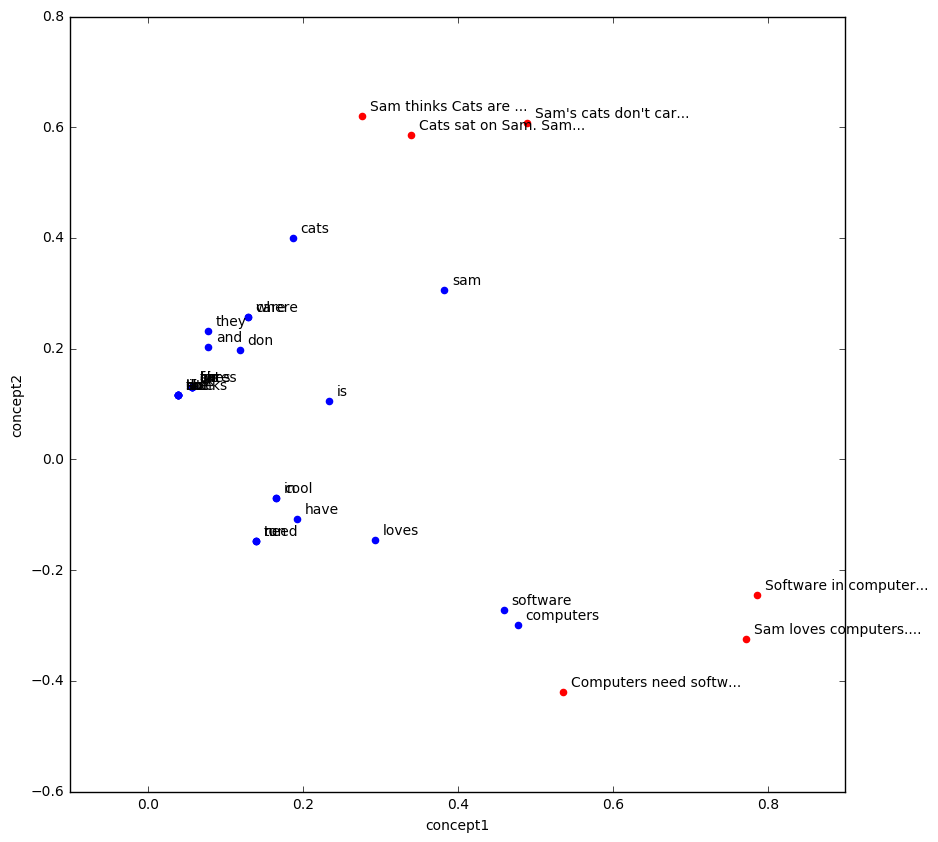

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

c1 = doc_concept.values[:,0].T
c2 = doc_concept.values[:,1].T

fig, ax = plt.subplots()
plt.xlabel('concept1')
plt.ylabel('concept2')
ax.scatter(c1, c2, color='r')


for i, txt in enumerate(doc_concept.index):
    ax.annotate(txt+'...', (c1[i]+0.01, c2[i]+0.01))
    
c1 = concept_word.values[0,:]
c2 = concept_word.values[1,:]

ax.scatter(c1, c2, color='b')
    
for i, txt in enumerate(concept_word.columns):
    ax.annotate(txt, (c1[i]+0.01, c2[i]+0.01))
    
## BELOW YOU SEE THE DOCUMENTS AND WORDS SHARING A COMMON CONCEPT SPACE. NOTICE HOW SIMILAR WORDS (e.g. - computer and software) 
## AND DOCUMENTS ARE CLUSTERED

# Activity

### Loaded are the text files of speeches given by US presidents over years.
#### Your task is to classify which speech was given by whom (let's not worry about test/train split)

2. Write your own preprocessing function for the corpus
3. Build LSI model on the data
4. Obtain the document vectors in LSI space and 
5. Classify using logistic regression/naive bayes/KNN classifier

Since we are learning syntax, let's not worry about train-test split or parameter tuning.

In [34]:
_files_all_speechs[1]

'1946-Truman.txt'

In [32]:
from nltk.corpus import state_union

_files_all_speechs = state_union.fileids()

all_raw_speeches = []
for _file_ in _files_all_speechs:
    all_raw_speeches.append(state_union.raw(_file_))

all_categories = [x.split('-')[1].split('.')[0] for x in _files_all_speechs]

print('Number of Speeches:', len(all_raw_speeches))
print(all_categories)

Number of Speeches: 65
['Truman', 'Truman', 'Truman', 'Truman', 'Truman', 'Truman', 'Truman', 'Eisenhower', 'Eisenhower', 'Eisenhower', 'Eisenhower', 'Eisenhower', 'Eisenhower', 'Eisenhower', 'Eisenhower', 'Kennedy', 'Kennedy', 'Johnson', 'Kennedy', 'Johnson', 'Johnson', 'Johnson', 'Johnson', 'Johnson', 'Johnson', 'Johnson', 'Nixon', 'Nixon', 'Nixon', 'Nixon', 'Nixon', 'Ford', 'Ford', 'Ford', 'Carter', 'Carter', 'Carter', 'Reagan', 'Reagan', 'Reagan', 'Reagan', 'Reagan', 'Reagan', 'Reagan', 'Reagan', 'Bush', 'Bush', 'Bush', 'Bush', 'Bush', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'GWBush', 'GWBush', 'GWBush', 'GWBush', 'GWBush', 'GWBush', 'GWBush']
